# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech


*   Nama: Aditya Yoga Adhiputra
*   Email: adityayogoal33@gmail.com
*   Id Dicoding: adityayogal33

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from joblib import dump

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Menyiapkan data yang akan digunakan

In [4]:
df = pd.read_csv('employee_data.csv')
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


## Data Understanding

**Dataset Description**

`EmployeeId` - Employee Identifier

`Attrition` - Did the employee attrition? (0=no, 1=yes)

`Age` - Age of the employee

`BusinessTravel` - Travel commitments for the job

`DailyRate` - Daily salary

`Department` - Employee Department

`DistanceFromHome` - Distance from work to home (in km)

`Education` - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor

`EducationField` - Field of Education

`EnvironmentSatisfaction` - 1-Low, 2-Medium, 3-High, 4-Very High

`Gender` - Employee's gender

`HourlyRate` - Hourly salary

`JobInvolvement` - 1-Low, 2-Medium, 3-High, 4-Very High

`JobLevel` - Level of job (1 to 5)

`JobRole` - Job Roles

`JobSatisfaction` - 1-Low, 2-Medium, 3-High, 4-Very High

`MaritalStatus` - Marital Status

`MonthlyIncome` - Monthly salary

`MonthlyRate` - Mounthly rate

`NumCompaniesWorked` - Number of companies worked at

`Over18` - Over 18 years of age?

`OverTime` - Overtime?

`PercentSalaryHike` - The percentage increase in salary last year

`PerformanceRating `- 1-Low, 2-Good, 3-Excellent, 4-Outstanding

`RelationshipSatisfaction` - 1-Low, 2-Medium, 3-High, 4-Very High

`StandardHours` - Standard Hours

`StockOptionLevel` - Stock Option Level

`TotalWorkingYears` - Total years worked

`TrainingTimesLastYear` - Number of training attended last year

`WorkLifeBalance` - 1-Low, 2-Good, 3-Excellent, 4-Outstanding

`YearsAtCompany` - Years at Company

`YearsInCurrentRole` - Years in the current role

`YearsSinceLastPromotion` - Years since the last promotion

`YearsWithCurrManager` - Years with the current manager

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [7]:
# mengecek dimensi dataset
df.shape

(1470, 35)

In [8]:
# Menampilkan statistik deskriptif pada dataset
df.describe

<bound method NDFrame.describe of       EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0              1   38        NaN  Travel_Frequently       1444   
1              2   37        1.0      Travel_Rarely       1141   
2              3   51        1.0      Travel_Rarely       1323   
3              4   42        0.0  Travel_Frequently        555   
4              5   40        NaN      Travel_Rarely       1194   
...          ...  ...        ...                ...        ...   
1465        1466   38        0.0      Travel_Rarely        168   
1466        1467   50        NaN      Travel_Rarely        813   
1467        1468   28        1.0      Travel_Rarely       1485   
1468        1469   40        0.0         Non-Travel        458   
1469        1470   19        1.0  Travel_Frequently        602   

                  Department  DistanceFromHome  Education    EducationField  \
0            Human Resources                 1          4             Other   
1     Research 

Mengecek jumlah tiap value pada kolom

In [9]:
df.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [10]:
df.JobRole.value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [11]:
df.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [12]:
df.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [13]:
df.Attrition.value_counts()

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

In [14]:
df.BusinessTravel.value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [15]:
# JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
df.JobInvolvement.value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [16]:
# JobLevel - Level of job (1 to 5)
df.JobLevel.value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [17]:
# JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
df.JobSatisfaction.value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [18]:
# EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
df.EnvironmentSatisfaction.value_counts()

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [19]:
# Education - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
df.Education.value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [20]:
# PerformanceRating- 1-Low, 2-Good, 3-Excellent, 4-Outstanding
df.PerformanceRating.value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [21]:
# RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
df.RelationshipSatisfaction.value_counts()

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [22]:
# WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
df.WorkLifeBalance.value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

## Data Preparation

Pengecekan Data yang hilang

In [23]:
## Mengecek null value pada dataframe
df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [24]:
## Mengecek duplicated value pada dataframe
df.duplicated().sum()

np.int64(0)

### **Data Cleaning**

**Membuang kolom yang tidak digunakan**
1.   `Over18`
2.   `EmployeeCount`
3.   `StandartHours`

In [25]:
# Membuang kolom yang tidak digunakan
df['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [26]:
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [27]:
df['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [28]:
df.drop(['Over18', 'EmployeeCount', 'StandardHours'], axis=1, inplace=True)

In [29]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Yes,11,3,2,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,No,15,3,1,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Yes,12,3,3,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,No,14,3,4,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,No,14,3,2,3,20,2,3,5,3,0,2


**Memperbaiki inkonsistensi data pada dataset dan mengembalikan value data nya berdasarkan keterangan pada data aslinya**

In [30]:
# `Attrition` - Did the employee attrition? (0=no, 1=yes)
df['Attrition'] = df['Attrition'].map({0: 'No', 1: 'Yes'})

In [31]:
# `Education` - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
df['Education'] = df['Education'].map({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})

In [32]:
# `EnvironmentSatisfaction` - 1-Low, 2-Medium, 3-High, 4-Very High
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})

In [33]:
# `JobInvolvement` - 1-Low, 2-Medium, 3-High, 4-Very High
df['JobInvolvement'] = df['JobInvolvement'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})

In [34]:
# `JobSatisfaction` - 1-Low, 2-Medium, 3-High, 4-Very High
df['JobSatisfaction'] = df['JobSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})

In [35]:
# `PerformanceRating `- 1-Low, 2-Good, 3-Excellent, 4-Outstanding
df['PerformanceRating'] = df['PerformanceRating'].map({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})

In [36]:
# `RelationshipSatisfaction` - 1-Low, 2-Medium, 3-High, 4-Very High
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})

In [37]:
# `WorkLifeBalance` - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
df['WorkLifeBalance'] = df['WorkLifeBalance'].map({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})

In [38]:
# Memformat value pada kolom BussinesTravel
df['BusinessTravel'] = df['BusinessTravel'].str.replace(r'[_-]', ' ', regex=True)

In [39]:
# Mengubah tipe data nya dari int menjadi str
df['EmployeeId'] = df['EmployeeId'].astype(str)

In [40]:
# Checking new dataset after cleaning data
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel Frequently,1444,Human Resources,1,Master,Other,Very High,Male,88,High,1,Human Resources,Medium,Married,2991,5224,0,Yes,11,Excellent,Medium,1,7,2,Excellent,6,2,1,2
1,2,37,Yes,Travel Rarely,1141,Research & Development,11,College,Medical,Low,Female,61,Low,2,Healthcare Representative,Medium,Married,4777,14382,5,No,15,Excellent,Low,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel Rarely,1323,Research & Development,4,Master,Life Sciences,Low,Male,34,High,1,Research Scientist,High,Married,2461,10332,9,Yes,12,Excellent,High,3,18,2,Outstanding,10,0,2,7
3,4,42,No,Travel Frequently,555,Sales,26,Bachelor,Marketing,High,Female,77,High,4,Sales Executive,Medium,Married,13525,14864,5,No,14,Excellent,Very High,1,23,2,Outstanding,20,4,4,8
4,5,40,NaN,Travel Rarely,1194,Research & Development,2,Master,Medical,High,Female,98,High,1,Research Scientist,High,Married,2001,12549,2,No,14,Excellent,Medium,3,20,2,Excellent,5,3,0,2


### **Exploratory Data Analysis**

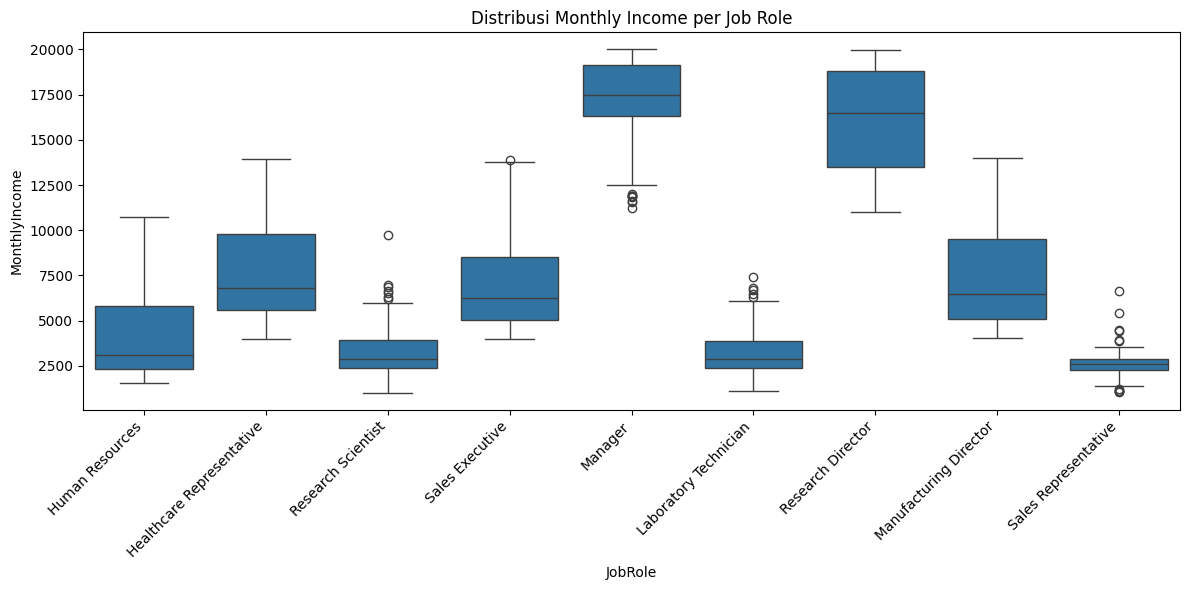

In [41]:
# Distribution Monthly Income per Job Role
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Monthly Income per Job Role')
plt.tight_layout()
plt.show()

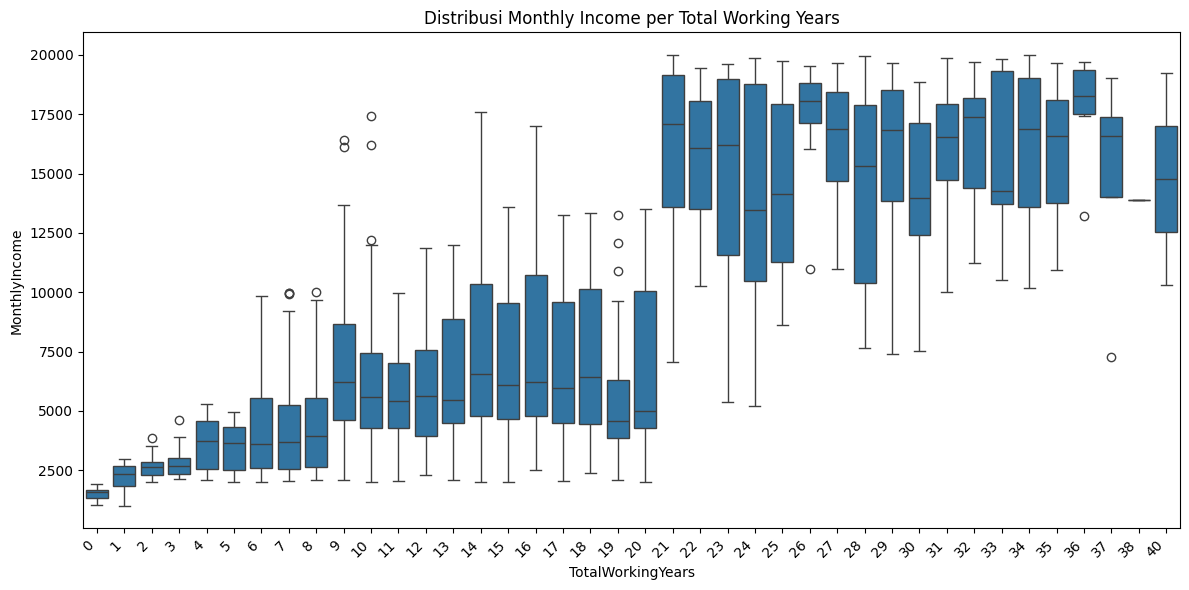

In [42]:
# Distribution monthly income per Total Working Years
plt.figure(figsize=(12, 6))
sns.boxplot(x='TotalWorkingYears', y='MonthlyIncome', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Monthly Income per Total Working Years')
plt.tight_layout()
plt.show()

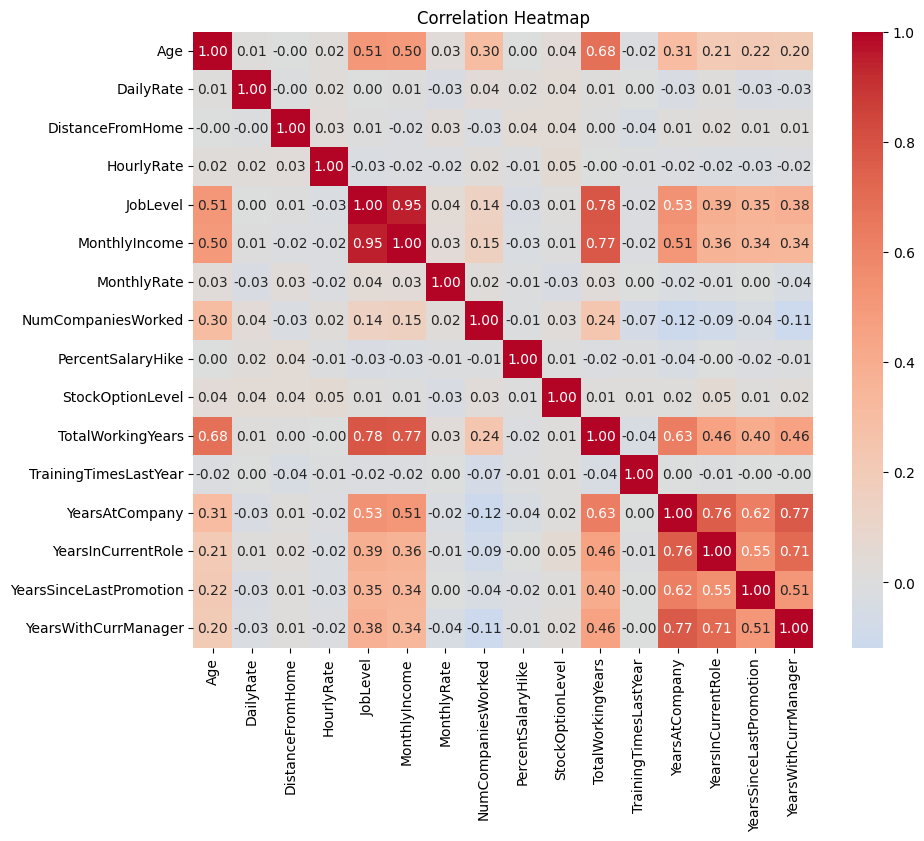

In [43]:
# Correlation for Numerical Data
numerical_cols = df.select_dtypes(include='number').columns
corr = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### **Data Spliting**
**Membagi Dataset menjadi 2 Data. Data yang mengandung outlier dan data yang tidak mengandung outlier**

In [44]:
# df with clean data
df_train = df[df['Attrition'].notna()]
df_train.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,Yes,Travel Rarely,1141,Research & Development,11,College,Medical,Low,Female,61,Low,2,Healthcare Representative,Medium,Married,4777,14382,5,No,15,Excellent,Low,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel Rarely,1323,Research & Development,4,Master,Life Sciences,Low,Male,34,High,1,Research Scientist,High,Married,2461,10332,9,Yes,12,Excellent,High,3,18,2,Outstanding,10,0,2,7
3,4,42,No,Travel Frequently,555,Sales,26,Bachelor,Marketing,High,Female,77,High,4,Sales Executive,Medium,Married,13525,14864,5,No,14,Excellent,Very High,1,23,2,Outstanding,20,4,4,8
6,7,40,No,Travel Rarely,1124,Sales,1,College,Medical,Medium,Male,57,Low,2,Sales Executive,Very High,Married,7457,13273,2,Yes,22,Outstanding,High,3,6,2,Good,4,3,0,2
7,8,55,Yes,Travel Rarely,725,Research & Development,2,Bachelor,Medical,Very High,Male,78,High,5,Manager,Low,Married,19859,21199,5,Yes,13,Excellent,Very High,1,24,2,Excellent,5,2,1,4


In [45]:
df_train.shape

(1058, 32)

In [46]:
# df with NaN data, this data used to predict model
df_test = df[df['Attrition'].isna()]
df_test.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel Frequently,1444,Human Resources,1,Master,Other,Very High,Male,88,High,1,Human Resources,Medium,Married,2991,5224,0,Yes,11,Excellent,Medium,1,7,2,Excellent,6,2,1,2
4,5,40,NaN,Travel Rarely,1194,Research & Development,2,Master,Medical,High,Female,98,High,1,Research Scientist,High,Married,2001,12549,2,No,14,Excellent,Medium,3,20,2,Excellent,5,3,0,2
5,6,29,NaN,Travel Rarely,352,Human Resources,6,Below College,Medical,Very High,Male,87,Medium,1,Human Resources,Medium,Married,2804,15434,1,No,11,Excellent,Very High,0,1,3,Excellent,1,0,0,0
12,13,47,NaN,Travel Rarely,571,Sales,14,Bachelor,Medical,High,Female,78,High,2,Sales Executive,High,Married,4591,24200,3,Yes,17,Excellent,High,1,11,4,Good,5,4,1,2
18,19,25,NaN,Travel Frequently,772,Research & Development,2,Below College,Life Sciences,Very High,Male,77,Very High,2,Manufacturing Director,High,Divorced,5206,4973,1,No,17,Excellent,High,2,7,6,Excellent,7,7,0,7


In [47]:
df_test.shape

(412, 32)

### **Data Transforming**
**Transforming/Labeling data using scaler and encode**

**Data clean for training model**

In [48]:
x_data_clean = df_train.drop(['Attrition','EmployeeId'], axis=1)
y_data_clean = df_train['Attrition']

In [49]:
x_data_pred = df_test.drop(['Attrition','EmployeeId'], axis=1)

In [51]:
y_data_clean = df_train['Attrition'].map({'Yes': 1, 'No': 0})

In [52]:
x_num = x_data_clean.select_dtypes(include='int64')
x_cat = x_data_clean.select_dtypes(include='object')

In [53]:
# Normalization clean data with Standar Scaler
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(x_num), columns=x_num.columns)

In [54]:
# Encode categorical data using label encoder
label_encoder_dict = {}
X_cat_encoded = x_cat.copy()

for col in x_cat.columns:
    le = LabelEncoder()
    X_cat_encoded[col] = le.fit_transform(x_cat[col])
    label_encoder_dict[col] = le

In [55]:
# Merging data  Encode and Standardization from df_test
X_fixed = pd.concat([X_num_scaled.reset_index(drop=True), X_cat_encoded.reset_index(drop=True)], axis=1)

**Data test (data target with NaN value in attrition) for training model**

In [56]:
x_test_pred = df_test.drop(['Attrition','EmployeeId'], axis=1)

In [57]:
x_test_pred_num = x_test_pred.select_dtypes(include='int64')
x_test_pred_cat = x_test_pred.select_dtypes(include='object')

In [65]:
x_test_pred_num_scaled = pd.DataFrame(scaler.transform(x_test_pred_num), columns=x_test_pred_num.columns)

In [63]:
x_test_pred_cat_encoded = x_test_pred_cat.copy()

for col in x_test_pred_cat.columns:
    le = label_encoder_dict[col]
    x_test_pred_cat_encoded[col] = le.transform(x_test_pred_cat[col])

In [68]:
# Merging data Encode and Standardization from df_test
X_test_pred_fixed = pd.concat([x_test_pred_num_scaled.reset_index(drop=True), x_test_pred_cat_encoded.reset_index(drop=True)], axis=1)

**Splitting Data using train_test_split**

In [69]:
#splitting data into a data train and data test
x_train, x_test, y_train, y_test = train_test_split(X_fixed, y_data_clean, test_size=0.1, random_state=42)

## Modeling

In [80]:
def models(x_train,y_train):

  loreg=LogisticRegression()
  loreg.fit(x_train,y_train)

  xgb=XGBClassifier()
  xgb.fit(x_train,y_train)

  svc=SVC()
  svc.fit(x_train,y_train)

  print('[0] Logistic Regression Training Accuracy:', loreg.score(x_train, y_train))
  print('[1] XGBoost Classifier Training Accuracy:', xgb.score(x_train, y_train))
  print('[2] Support Vector Machine Training Accuracy:', svc.score(x_train, y_train))

  return  {
        'Logistic Regression': loreg,
        'XGBoost Classifier': xgb,
        'Support Vector Machine': svc
    }

In [81]:
#Menjalankan fit model dengan data train
model = models(x_train,y_train)

[0] Logistic Regression Training Accuracy: 0.8623949579831933
[1] XGBoost Classifier Training Accuracy: 1.0
[2] Support Vector Machine Training Accuracy: 0.8371848739495799


## Evaluation

In [84]:
# menjalakan evaluasi kinerja model
for name, mdl in model.items():
    cm = confusion_matrix(y_test, mdl.predict(x_test))
    TN, FP, FN, TP = cm.ravel()
    accuracy = (TP + TN) / (TP + TN + FN + FP)
    print(cm)
    print(f'Model[{name}] Testing Accuracy = "{accuracy}"\n')

[[82  1]
 [16  7]]
Model[Logistic Regression] Testing Accuracy = "0.839622641509434"

[[82  1]
 [13 10]]
Model[XGBoost Classifier] Testing Accuracy = "0.8679245283018868"

[[83  0]
 [23  0]]
Model[Support Vector Machine] Testing Accuracy = "0.7830188679245284"



**Membuat fix model dengan model XGBClassifier**

In [85]:
fix_model = XGBClassifier()
fix_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [86]:
accuracy = fix_model.score(x_test, y_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.8679245283018868


### **Testing Model**
Testing model menggunakan data test yang berasal dari dataframe yang mengandung nilai NaN

In [88]:
y_pred = fix_model.predict(X_test_pred_fixed)

In [90]:
df_test.loc[df_test['Attrition'].isna(), 'Attrition'] = y_pred

In [95]:
matrix = confusion_matrix(df_test['Attrition'], y_pred)
matrix

array([[380,   0],
       [  0,  32]])

In [96]:
df_test.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,0,Travel Frequently,1444,Human Resources,1,Master,Other,Very High,Male,88,High,1,Human Resources,Medium,Married,2991,5224,0,Yes,11,Excellent,Medium,1,7,2,Excellent,6,2,1,2
4,5,40,0,Travel Rarely,1194,Research & Development,2,Master,Medical,High,Female,98,High,1,Research Scientist,High,Married,2001,12549,2,No,14,Excellent,Medium,3,20,2,Excellent,5,3,0,2
5,6,29,0,Travel Rarely,352,Human Resources,6,Below College,Medical,Very High,Male,87,Medium,1,Human Resources,Medium,Married,2804,15434,1,No,11,Excellent,Very High,0,1,3,Excellent,1,0,0,0
12,13,47,0,Travel Rarely,571,Sales,14,Bachelor,Medical,High,Female,78,High,2,Sales Executive,High,Married,4591,24200,3,Yes,17,Excellent,High,1,11,4,Good,5,4,1,2
18,19,25,0,Travel Frequently,772,Research & Development,2,Below College,Life Sciences,Very High,Male,77,Very High,2,Manufacturing Director,High,Divorced,5206,4973,1,No,17,Excellent,High,2,7,6,Excellent,7,7,0,7


In [97]:
df_test['Attrition'].value_counts()

Attrition
0    380
1     32
Name: count, dtype: int64

In [100]:
#Mengubah hasil dari prediksi nya yaitu 0 menjadi 'No' dan 1 menjadi 'Yes'
df_test.loc[:, 'Attrition'] = df_test['Attrition'].map({0: 'No', 1: 'Yes'})

**Menggabungkan dua dataset, dataset train dan dataset test yang sudah dilakukan prediksi**

In [111]:
df_final = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

In [112]:
df_final.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,37,Yes,Travel Rarely,1141,Research & Development,11,College,Medical,Low,Female,61,Low,2,Healthcare Representative,Medium,Married,4777,14382,5,No,15,Excellent,Low,0,15,2,Low,1,0,0,0
1,3,51,Yes,Travel Rarely,1323,Research & Development,4,Master,Life Sciences,Low,Male,34,High,1,Research Scientist,High,Married,2461,10332,9,Yes,12,Excellent,High,3,18,2,Outstanding,10,0,2,7
2,4,42,No,Travel Frequently,555,Sales,26,Bachelor,Marketing,High,Female,77,High,4,Sales Executive,Medium,Married,13525,14864,5,No,14,Excellent,Very High,1,23,2,Outstanding,20,4,4,8
3,7,40,No,Travel Rarely,1124,Sales,1,College,Medical,Medium,Male,57,Low,2,Sales Executive,Very High,Married,7457,13273,2,Yes,22,Outstanding,High,3,6,2,Good,4,3,0,2
4,8,55,Yes,Travel Rarely,725,Research & Development,2,Bachelor,Medical,Very High,Male,78,High,5,Manager,Low,Married,19859,21199,5,Yes,13,Excellent,Very High,1,24,2,Excellent,5,2,1,4


In [114]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   Attrition                 1058 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   object
 8   EducationField            1470 non-null   object
 9   EnvironmentSatisfaction   1470 non-null   object
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   object
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

## Deployment
**Saving model and dataset**

In [115]:
#Menyimpan dataset yang lengkap dari gabungan dua dataframe awal.
employee_clean_data = df_final.to_csv('employee_clean_data.csv', index=False)

In [116]:
# Simpan model ke file
joblib.dump(fix_model, 'model/fix_model.joblib')

['model/fix_model.joblib']

In [117]:
# Menyimpan scaler model
joblib.dump(scaler, 'model/scaler.joblib')

['model/scaler.joblib']

In [118]:
# Menyimpan label_encoder model
joblib.dump(label_encoder_dict, 'model/label_encoder_dict.joblib')

['model/label_encoder_dict.joblib']